In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.display import Image

On the quick, low res runs yesterday, I compared the timesteps at 200 for the two different boudnary condiitons. For the right panel that is the ones with the BC where all components of momentum is =0 at the inner boundary. This causes matter to "stick" there and effectively stablizes the torus which is not good. So I did not use that BC for the high res run, only did the density floor. 

- at t=214 the BC case completely sharply dies off with dt=0 

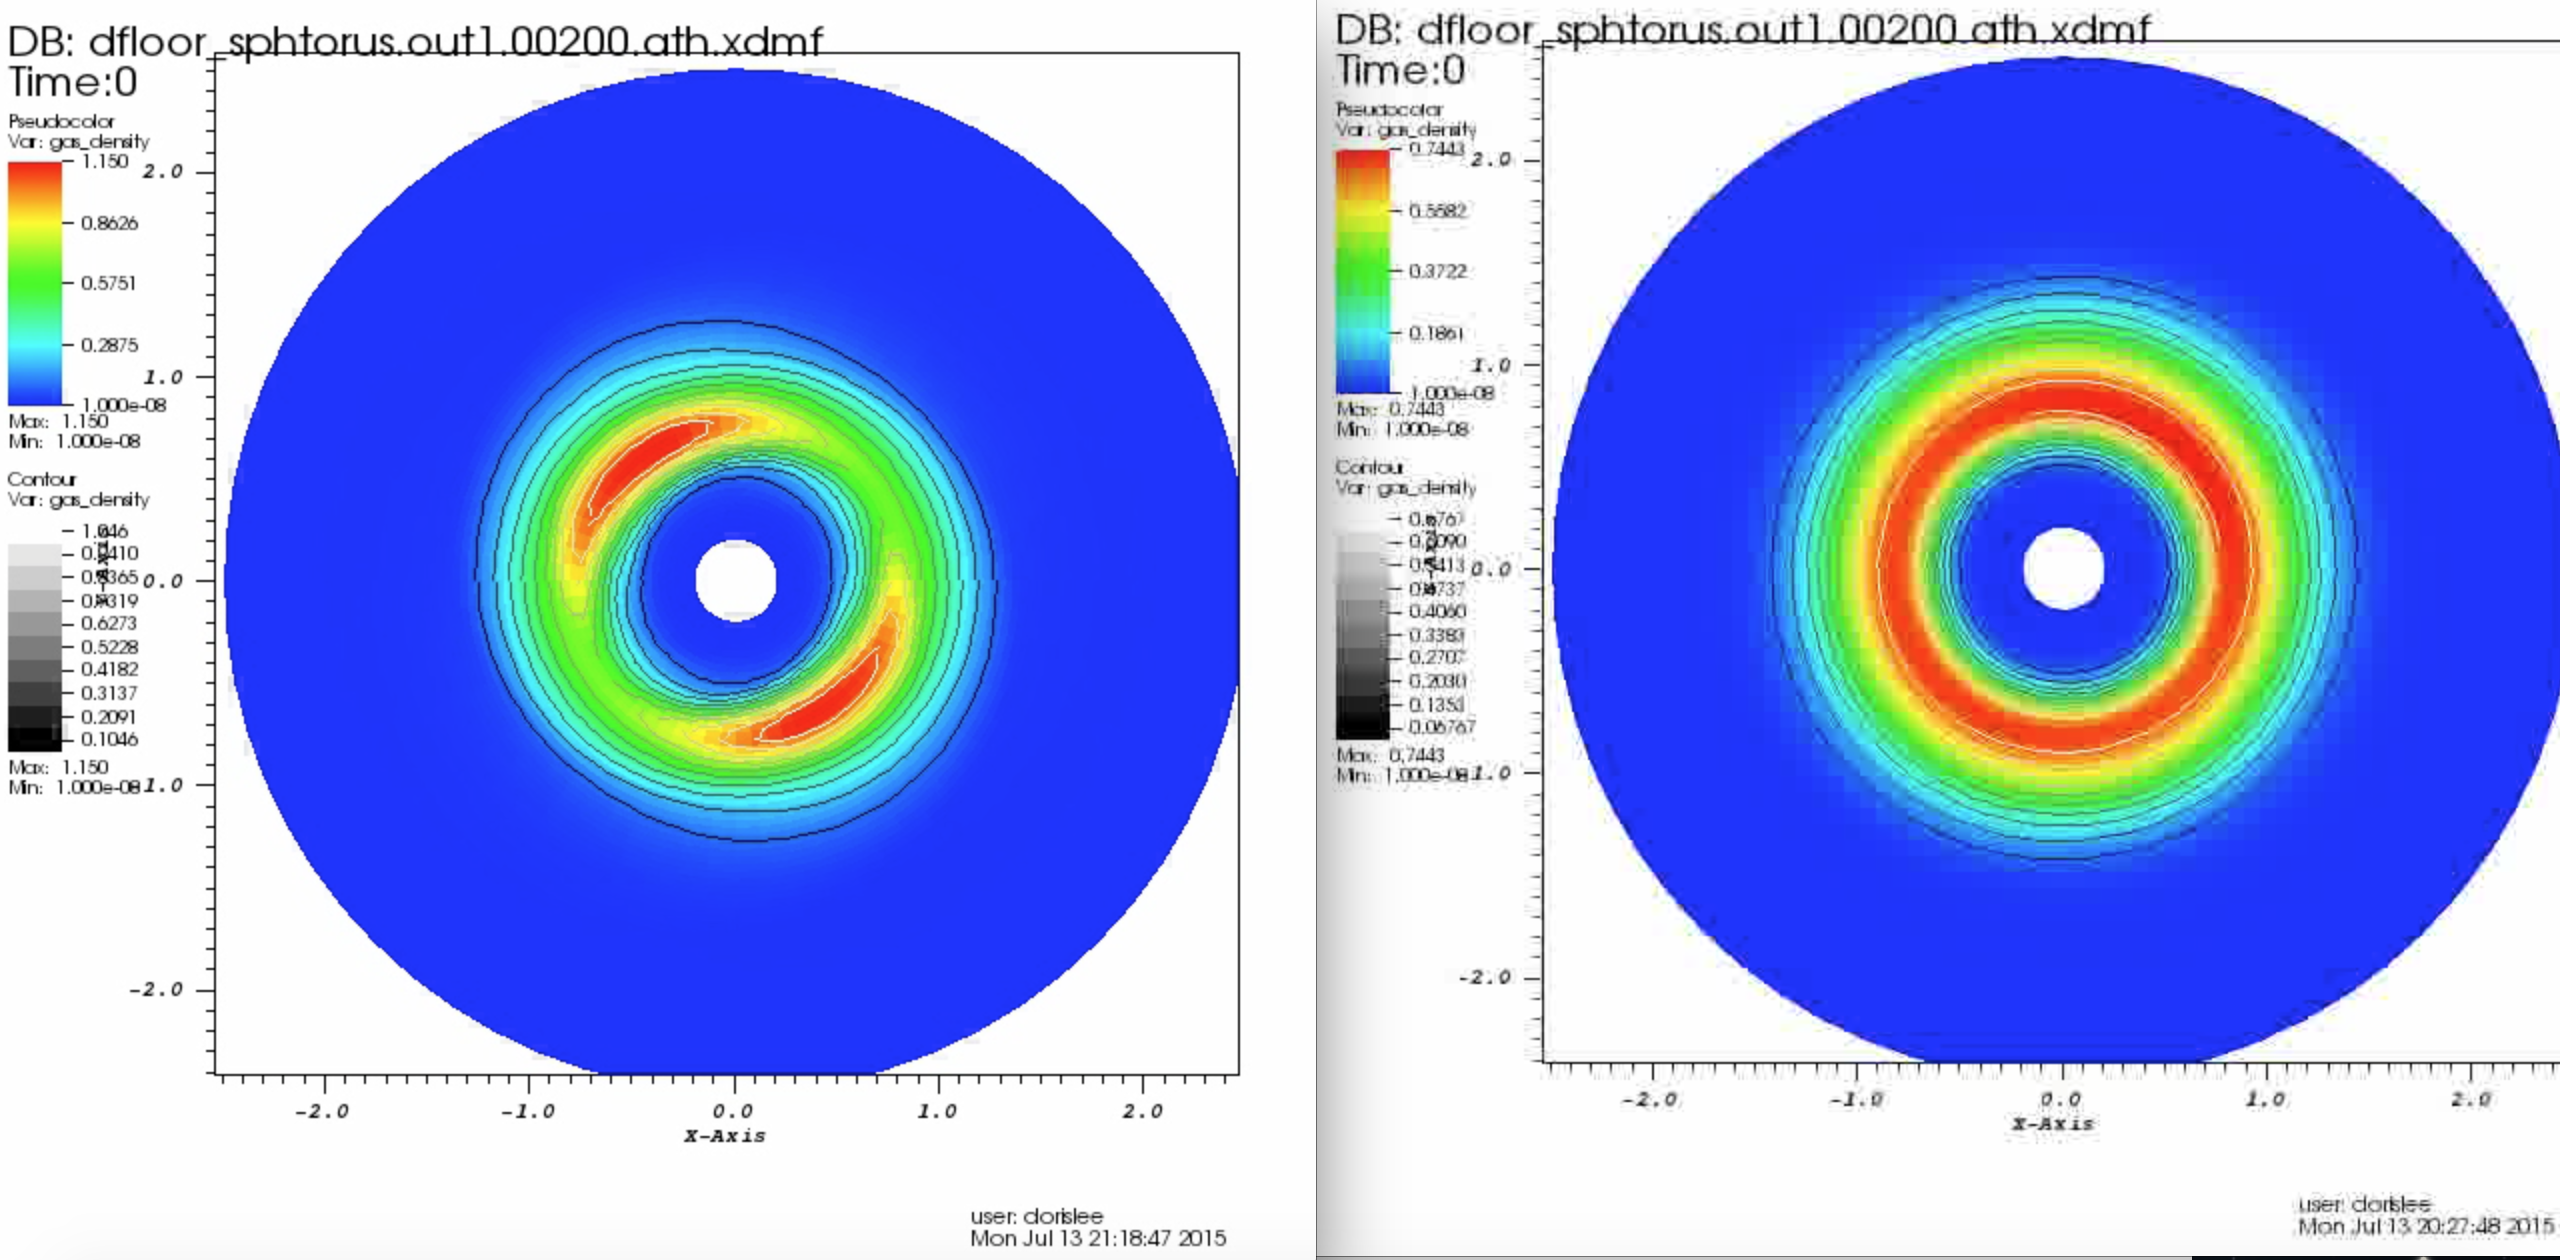

In [4]:
Image(filename="../../../data/comparet_200.png",width=1000)

Something really weird is happening in the BC case when I look at the velocity distribution 

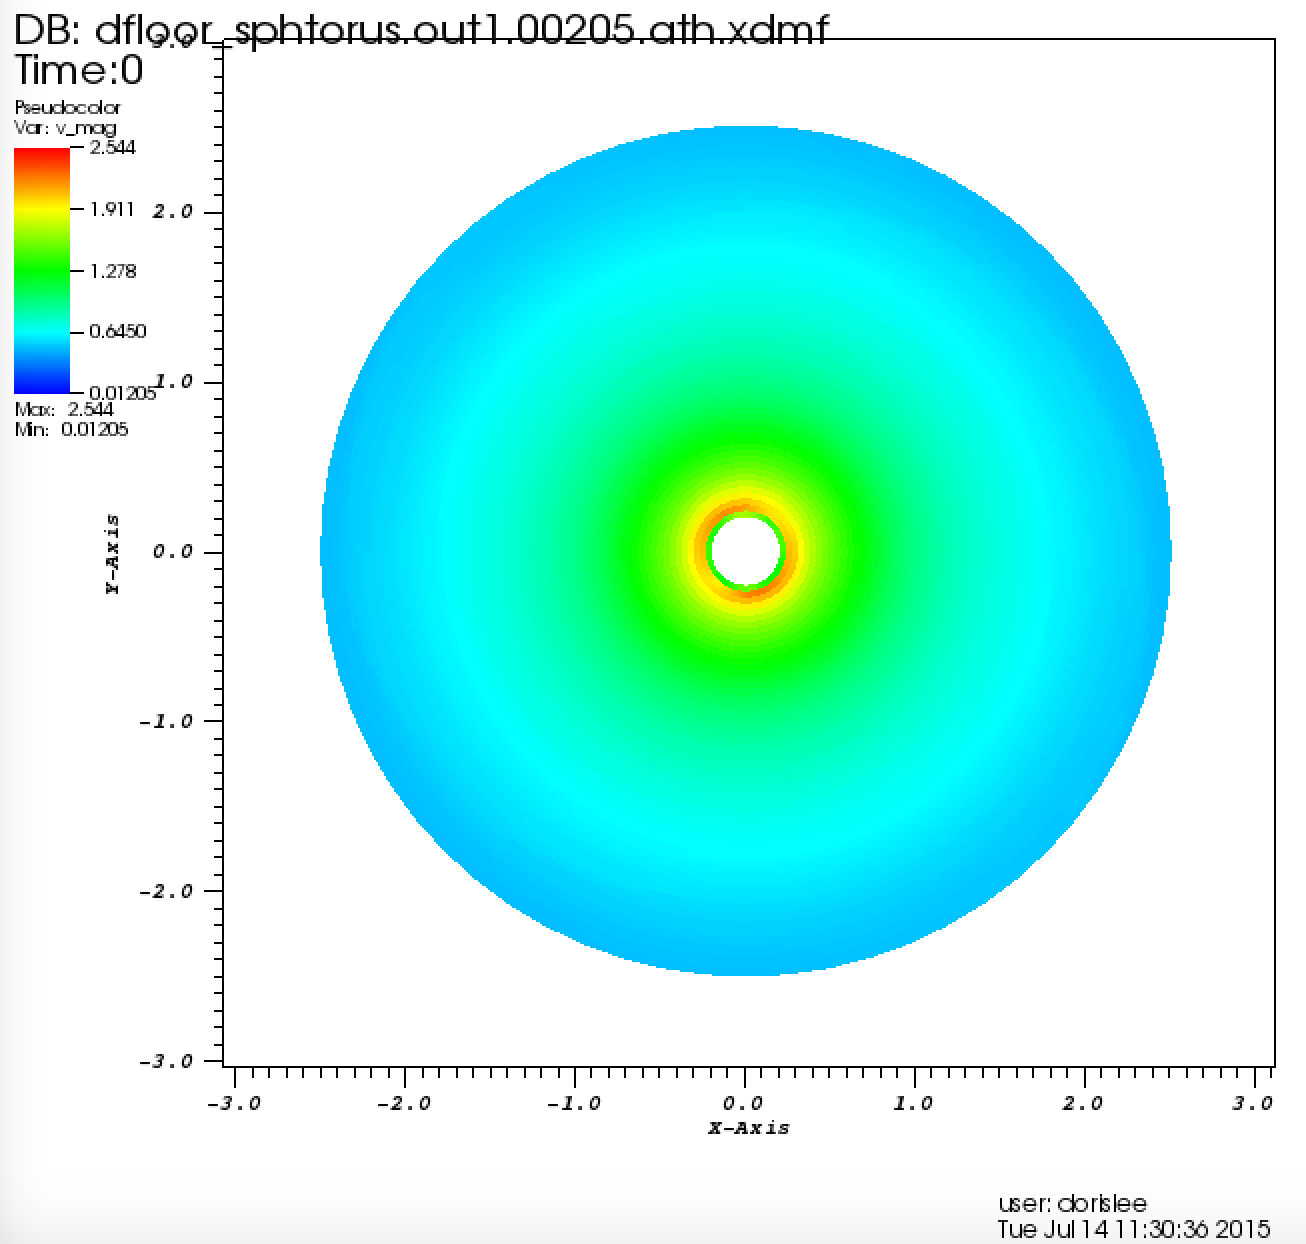

In [7]:
Image(filename="img/t205.png",width=500)

Then at the next timestep everything goes to v=0? and the maximum velcity becomes v_mag= 94 but I don't see this large velocity anywhere in the picture not even in the spreadsheet '

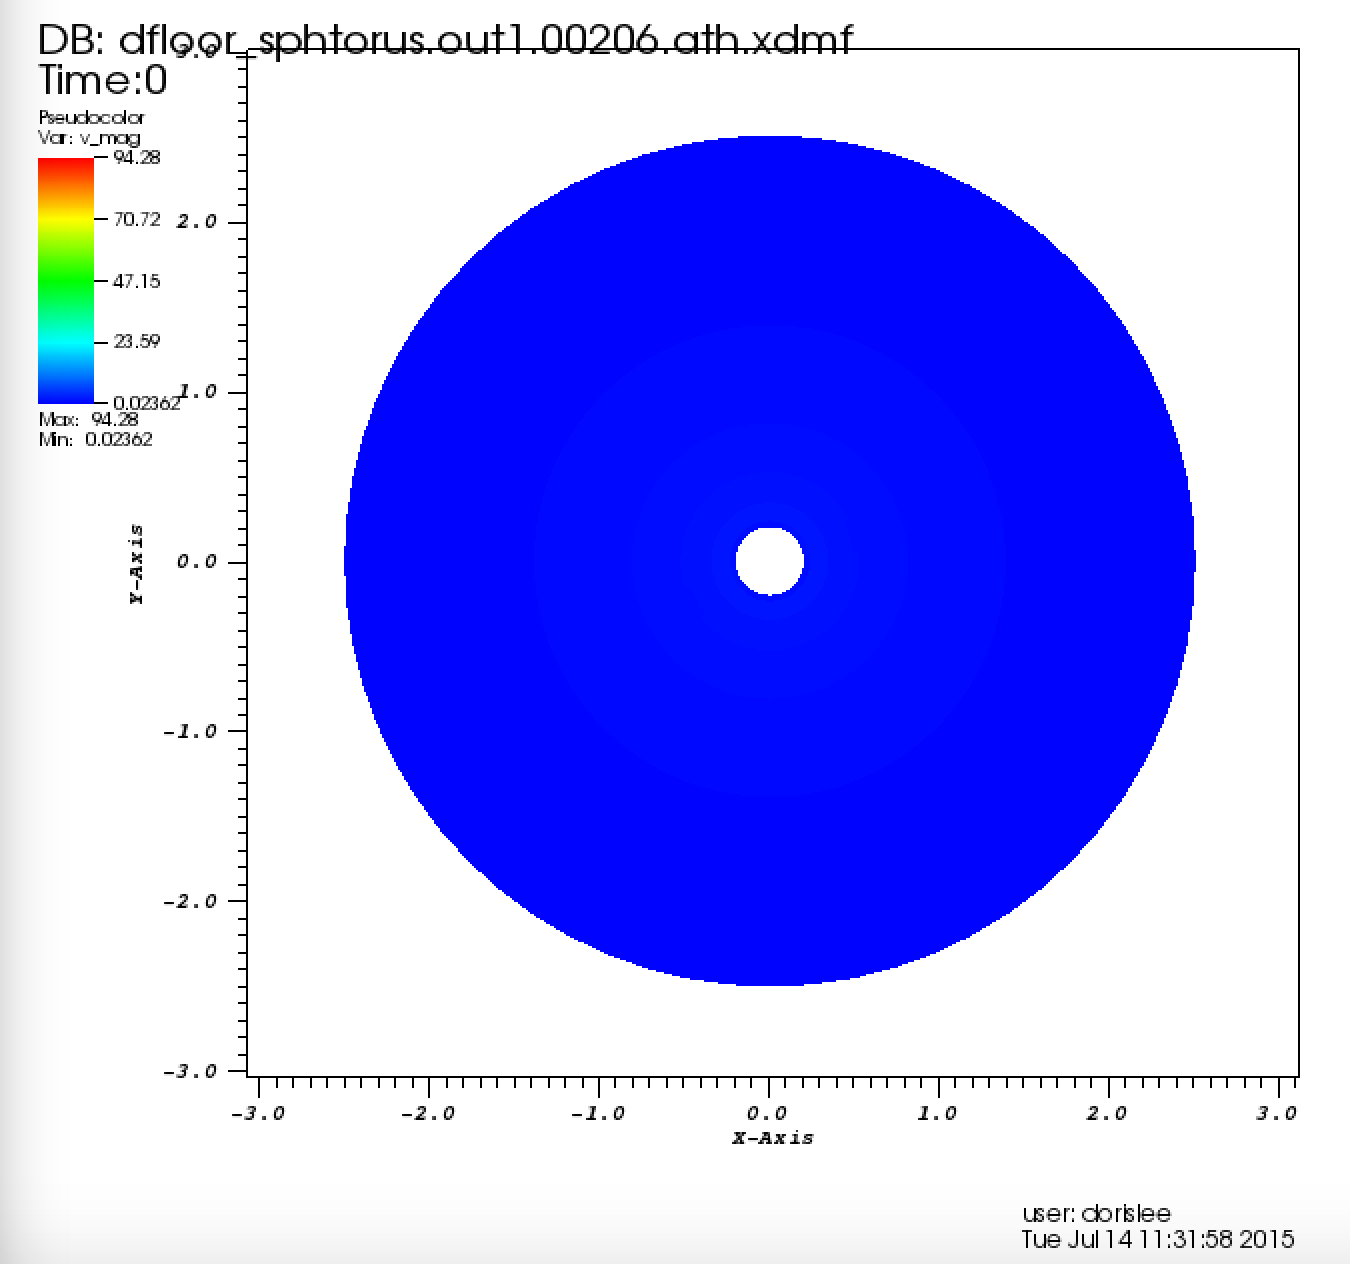

In [6]:
Image(filename="img/t206.png",width=500)

# d=1.17269

Relized that I used the wrong distortion parameter, so I did two low resolution run again with the correct distrotion parmaeter (in model A of Hawleys' paper)
The dependency on BC is much more evident here than for d=1.125. I had to kill the run for the BC case at t=54 because the dt was getting to 10e-15

This is essentially then same except everything happens earlier. the BC crashes earlier (but in the same way) and the dfloor runs corresponds to a ealier timestep than in the d=1.125 simulations

Gas is not conserved? The density of the torus gets lower and lower in the non linear regime.

#### Lots of computer stuff
- setup ssh on charon to nersc
- setup visit xml profile on charon to nersc (can't use hopper since visit 2.7 need 2.9 but edison has the older version)
- unresolved : visit keeps crashing for no reason when I group together a lot of the file and get kicked off the engine
    - I suspect this is because one of the files in the group that I am looking at is corrupted
- unresolved : IPython notebook

- Can not restart with different number of MPI setup midway thorugh simulation
- Note: make the color bars fixed for making movies so that density changes can actually be seen for the same colorbar as reference



# Four Test cases  for Boundary Conditions

Athena_1

- crashed at : cycle=633313 time=9.49467006892587e+01 dt=2.02953828555868e-24

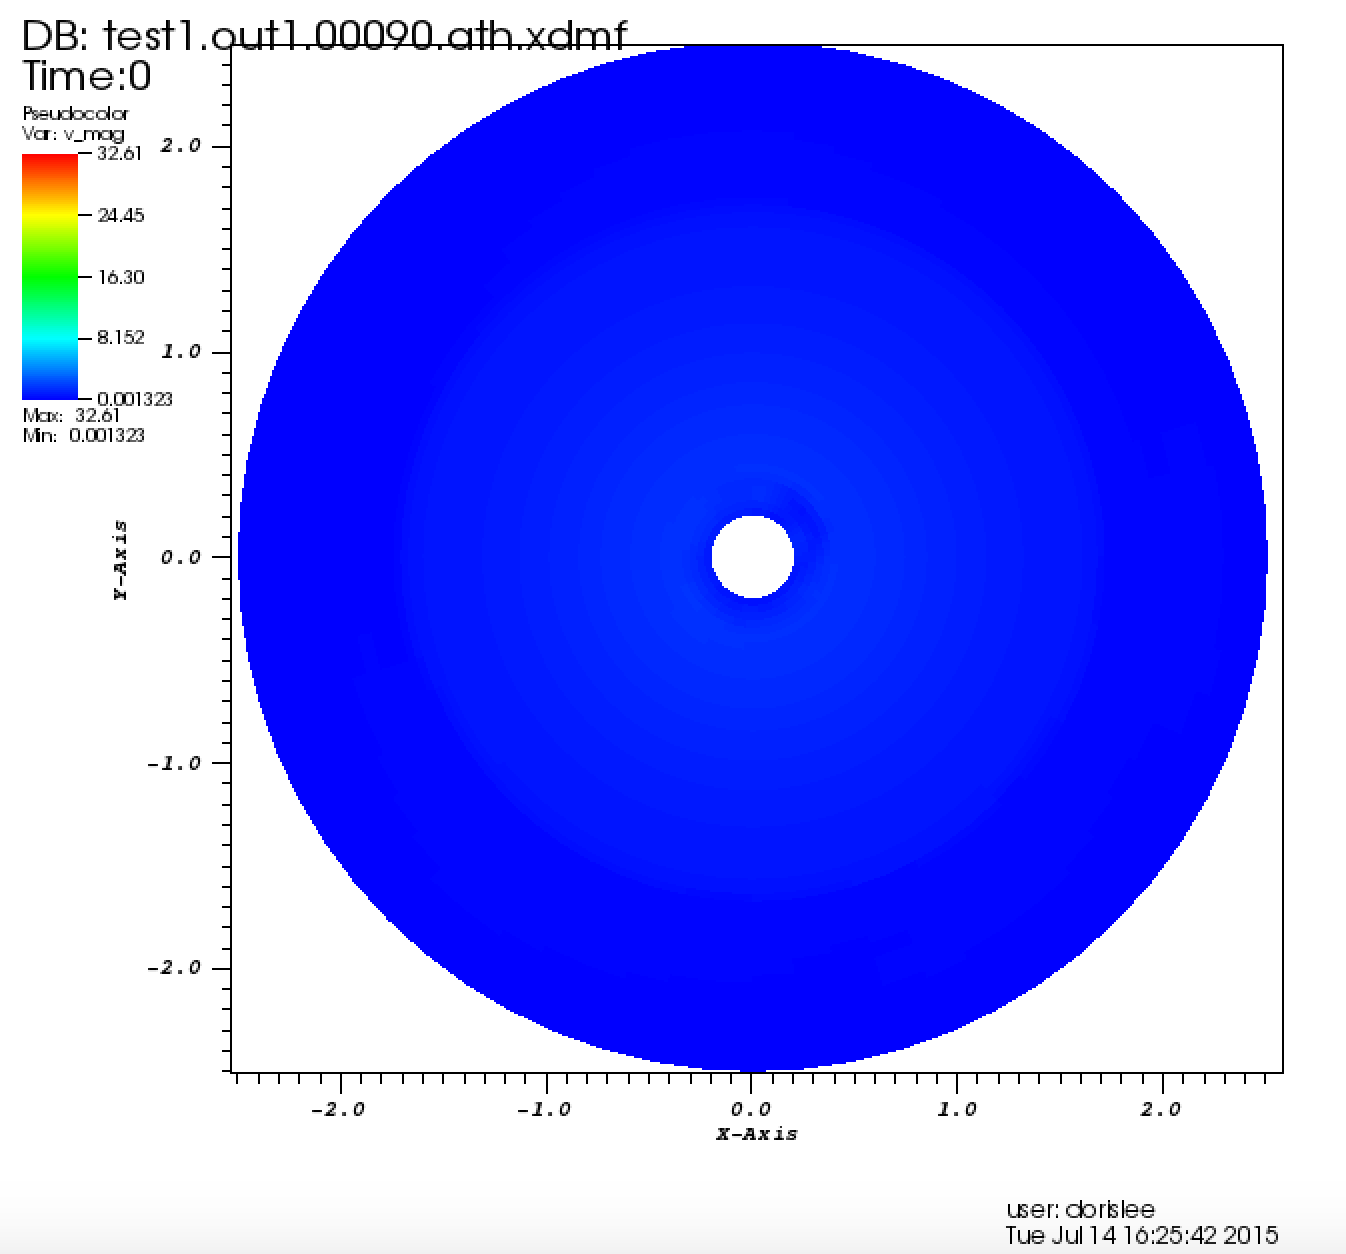

In [3]:
Image("img/athena1.png",width=500)

very strange high velocity at one single grid cell

Athena_2
- crashed at : cycle=625554 time=1.99236253931637e+02 dt=0.00000000000000e+00

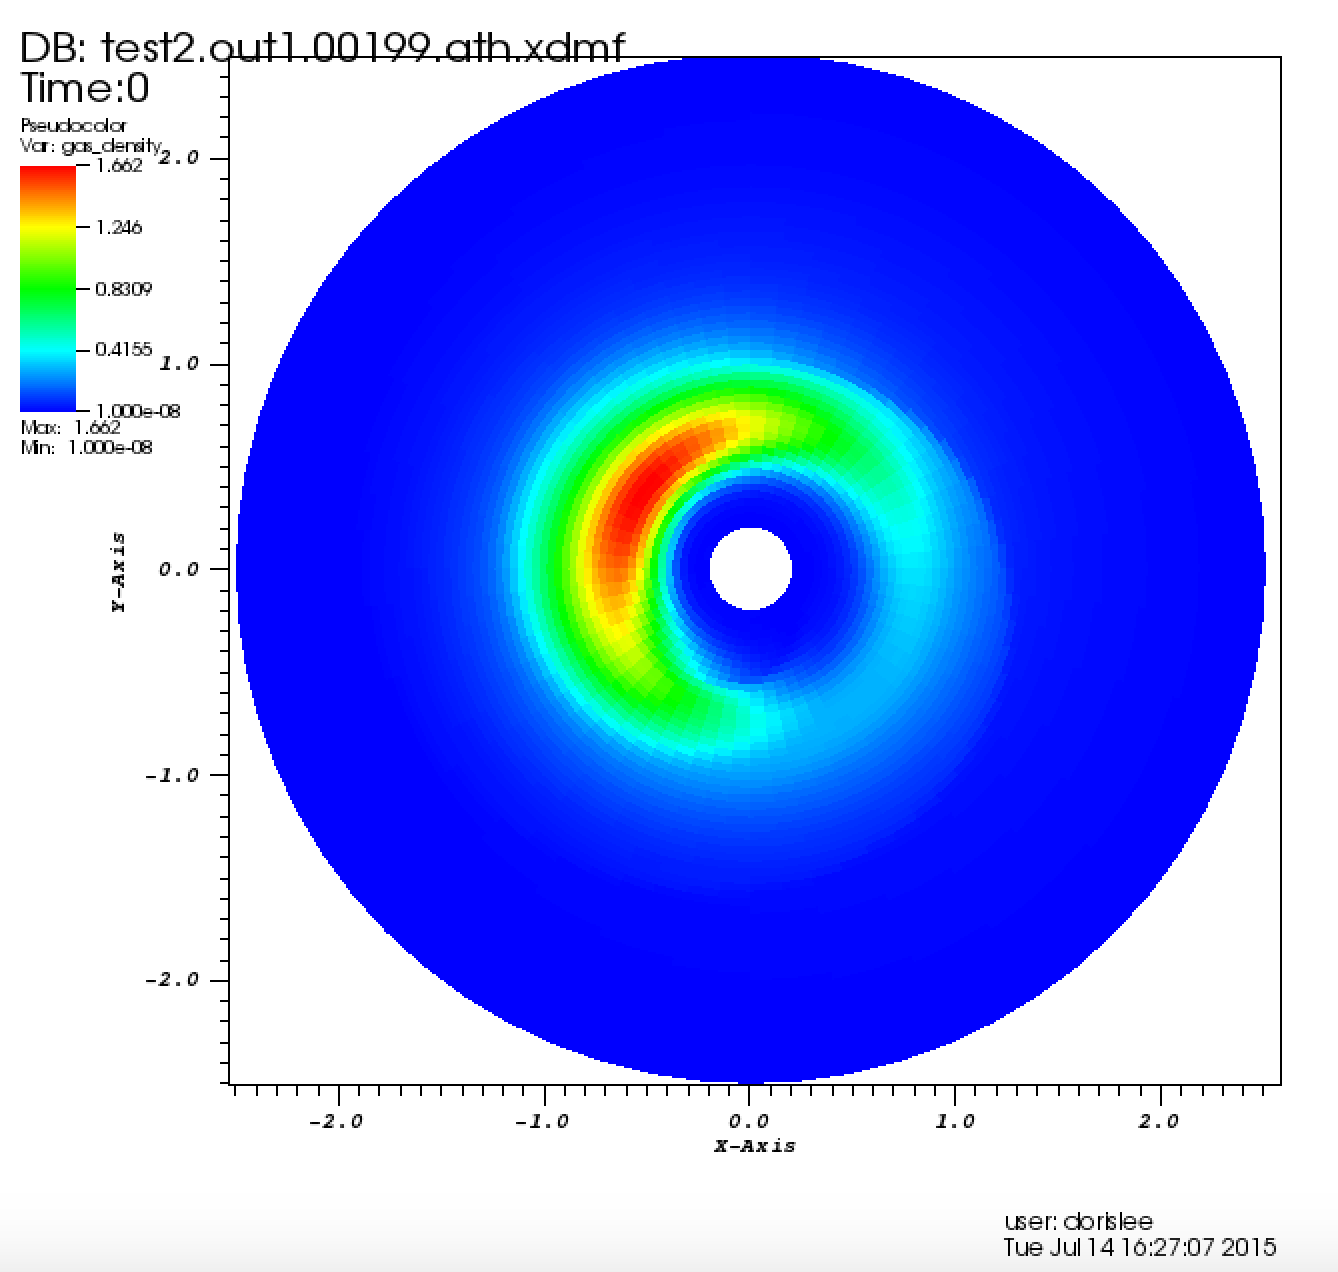

In [4]:
Image("img/athena2_density.png",width=500)

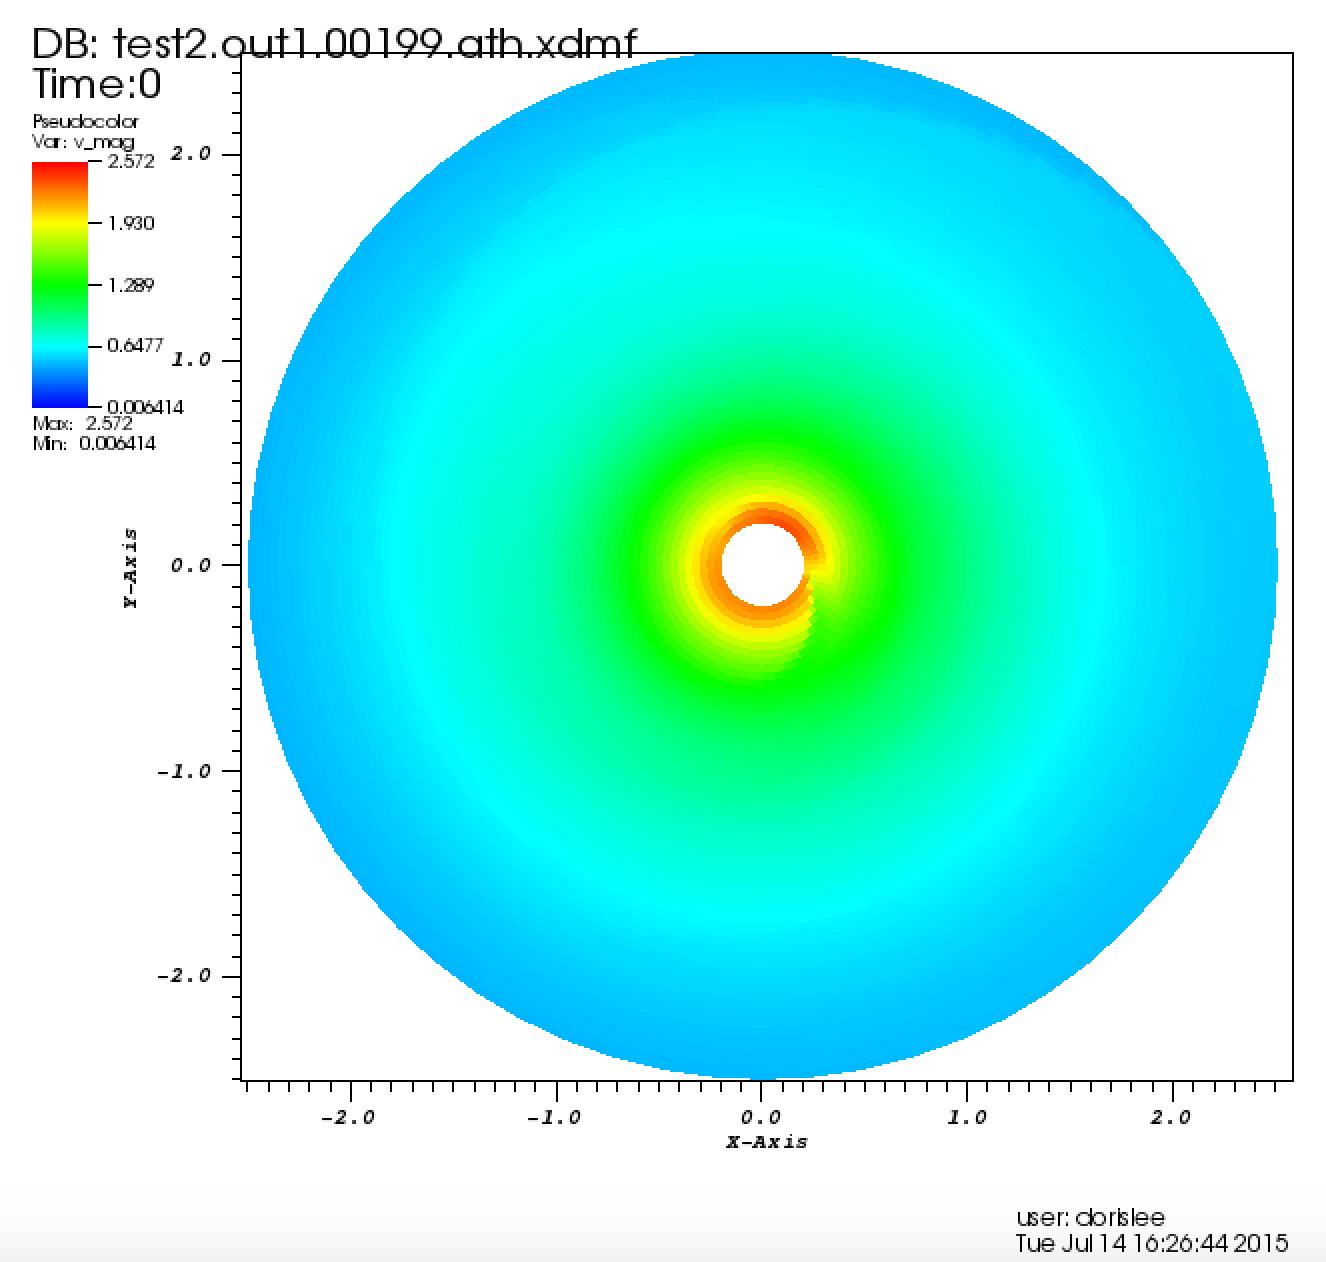

In [5]:
Image("img/athena2_vmag.png",width=500)

Doesn't crash until 31 orbits so we are using this B.C. from now on. 

athena_3
- cycle=859141 time=5.23429478035688e+01 dt=0.00000000000000e+00

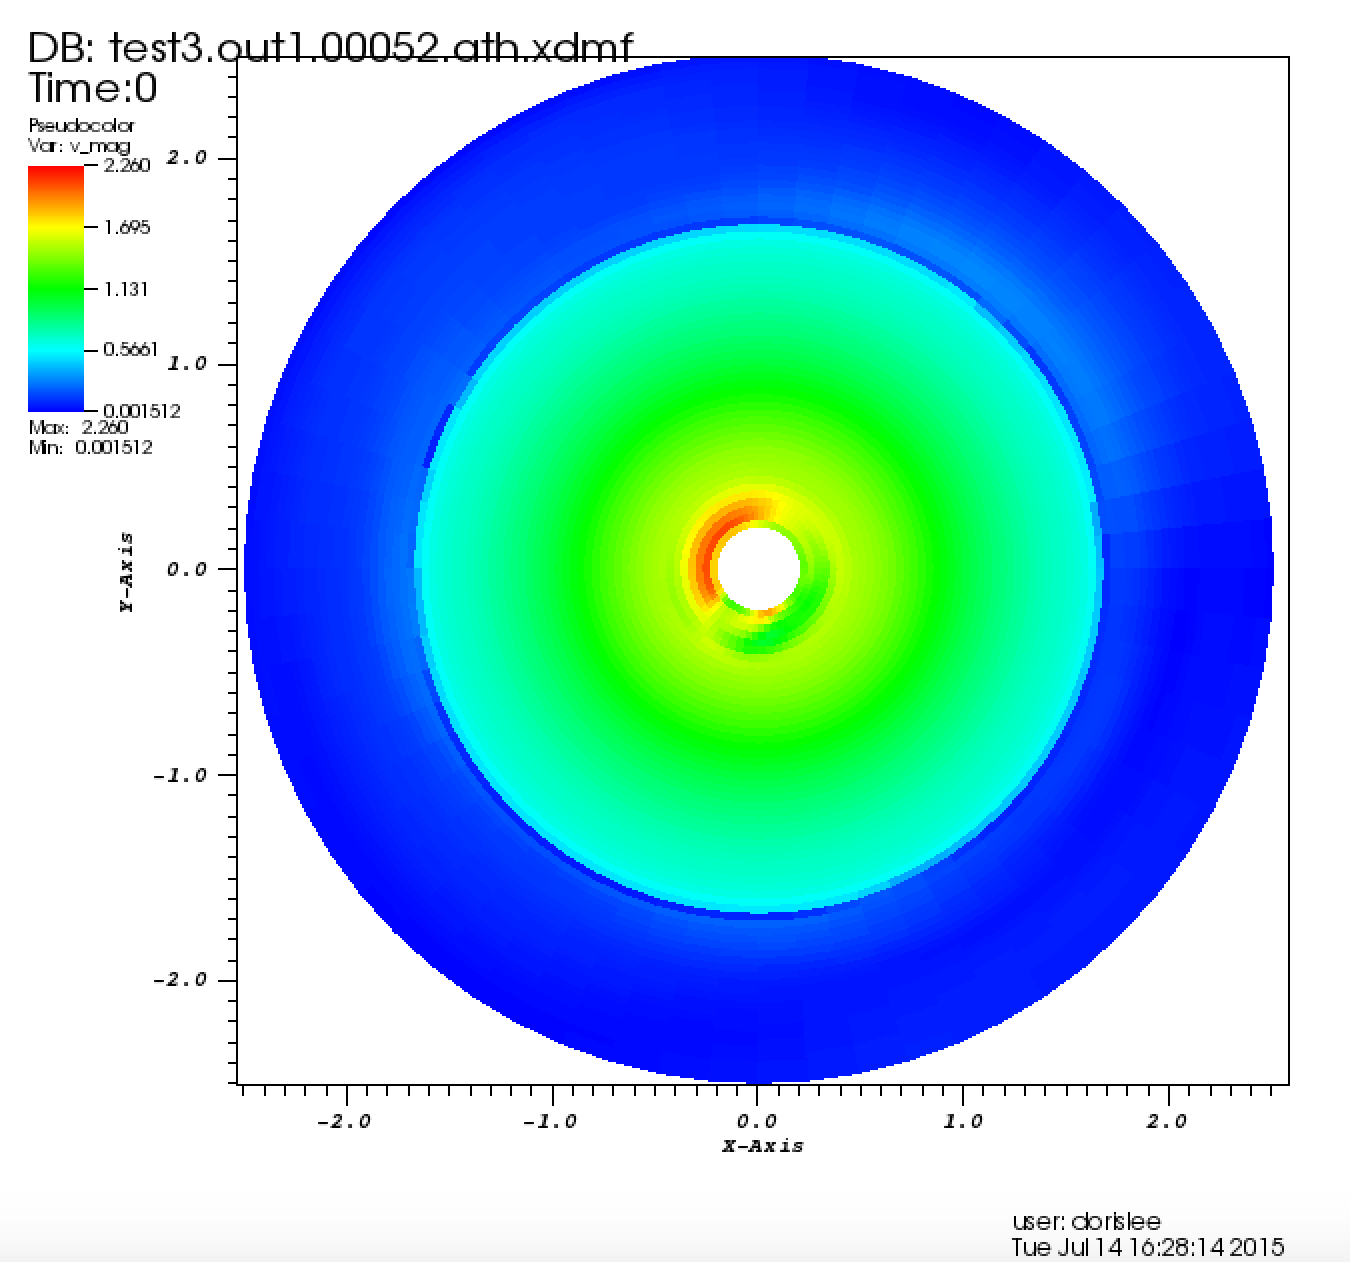

In [7]:
Image("img/athena3_vmag.png",width=500)

Athena_4
- cycle=767541 time=4.48478434623307e+01 dt=4.98766529402286e-34

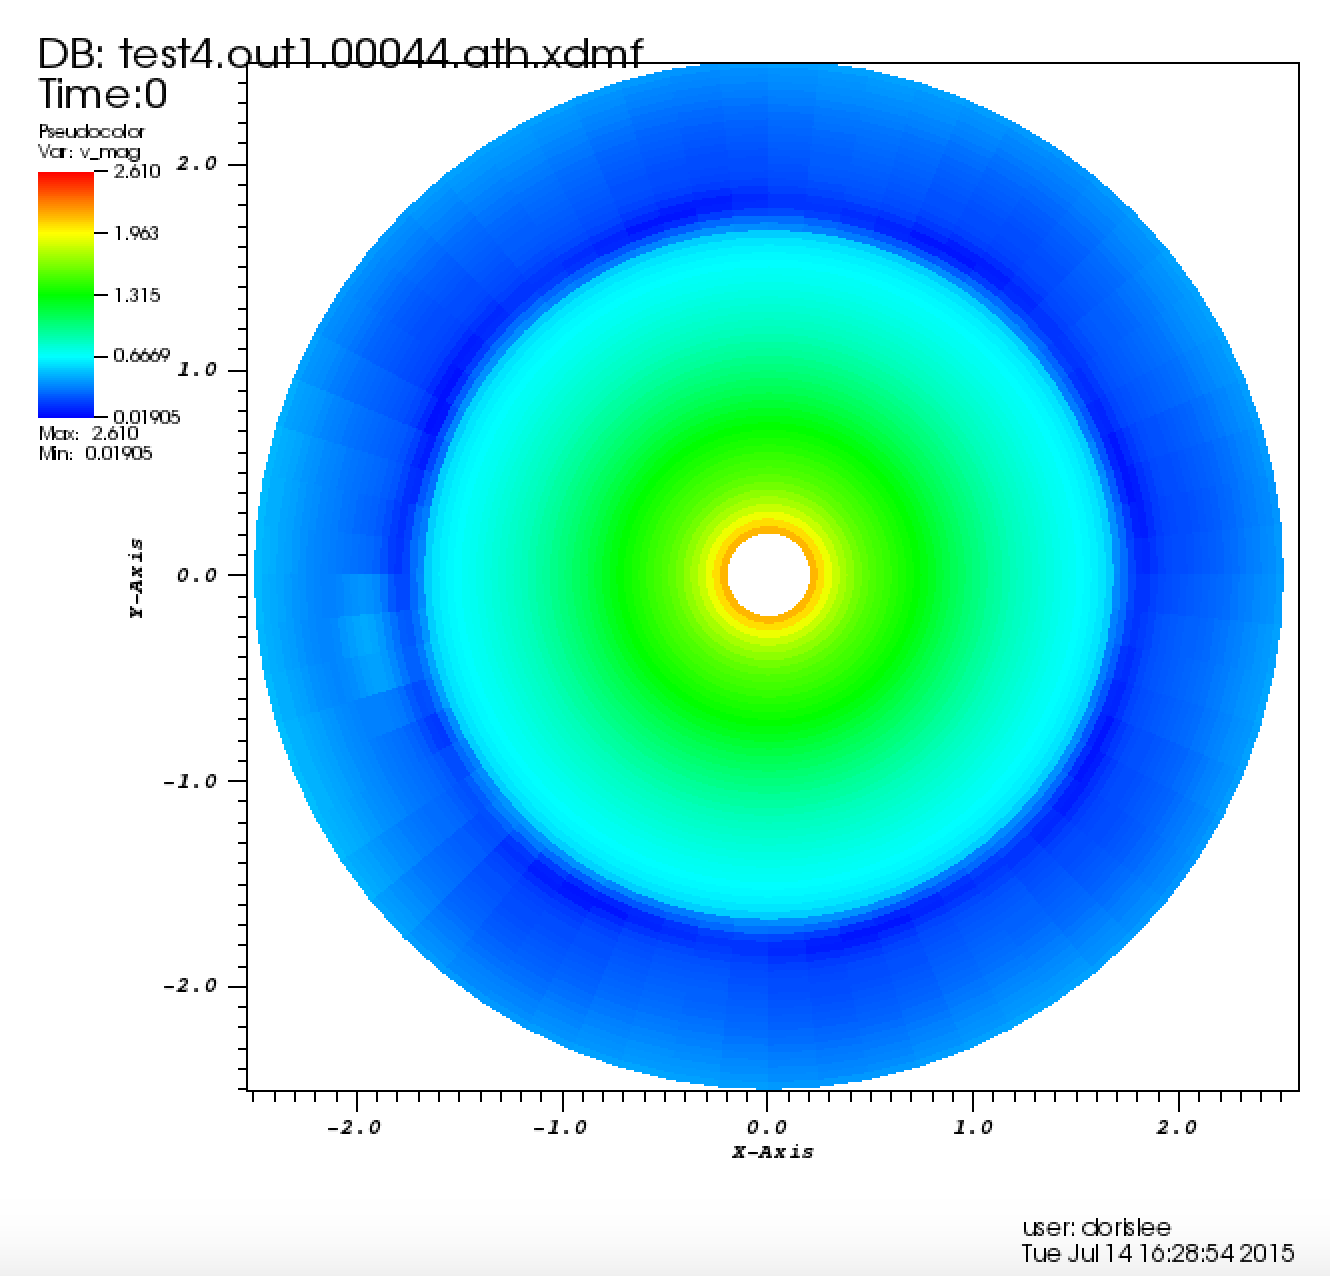

In [8]:
Image("img/athena4_v_mag.png",width=500)

### Log gridding 

- to help alleviate the problem of low density gas on the perimeter so end too quickly , if we have more computational domain on the outside then more gas but we don't have to resolve these as much'

- Stopped the simulation at t=34 because forgot to raise the density floor 7e-5 is the min right now, I was going to set a e-6 floor so this should not have affected the simulation before this point anyways. 